In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# A função U(x, y)
def U_pot(x,y):
    return np.sin(x) * np.cos(y) + (x * y)**2 / 500


# Definindo os gradientes de potencial x e y
def Grad_pot(x, y):
    dgradx=np.cos(x)*np.cos(y)+x*y**2/250
    dgrady=-np.sin(x)*np.sin(y)+y*x**2/250
    return np.array([dgradx,dgrady])


In [7]:
# Descenso por gradiente
# parâmetros 
taxa_apre=0.2
tolerancia=1e-6
max_itera=1000
# ponto inicial (pode trocar)
x,y=0,1
# dados salvados
caminho=[(x,y)]
   
for i in range(max_itera):
    grad=Grad_pot(x,y)
       
    x_nov0=x-taxa_apre*grad[0]
    y_novo=y-taxa_apre*grad[1]
        
    muda_valor=abs(U_pot(x_nov0,y_novo)-U_pot(x,y))
    x,y=x_nov0,y_novo
    
    caminho.append((x,y))
    if muda_valor < tolerancia:
        print(f"convergiu em {i+1} iterações")
        break
           
# resultados
print(f"Mínimo en: x={x:.6f},y={y:.6f}")
print(f"Valor mínimo de f(x,y)={U_pot(x,y):.6f}")    

convergiu em 37 iterações
Mínimo en: x=-1.569522,y=0.001049
Valor mínimo de f(x,y)=-0.999999


In [8]:
# Crear malla para la gráfica 3D
x_valo = np.linspace(-3, 3, 100)
y_valo = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_valo, y_valo)
Z=U_pot(X, Y)


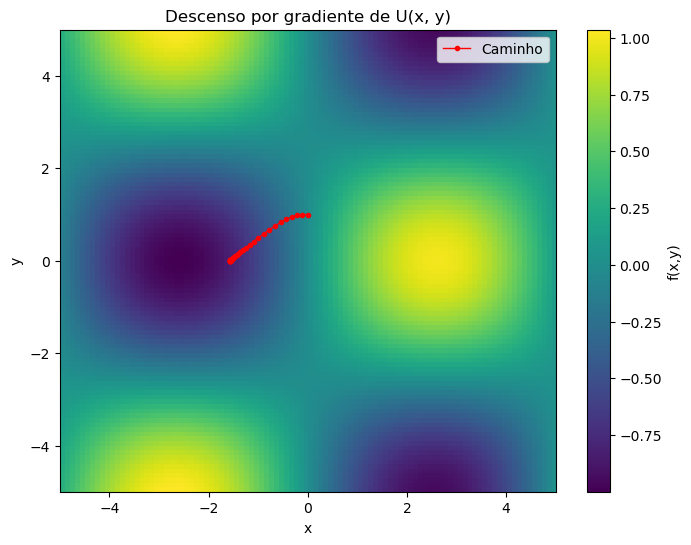

In [9]:

# Plot usando imshow
plt.figure(figsize=(8,6))
plt.imshow(Z,extent=[-5,5,-5,5],origin='lower',cmap='viridis',aspect='auto')
plt.colorbar(label='f(x,y)')
plt.title("Descenso por gradiente de U(x, y)")
plt.xlabel("x")
plt.ylabel("y")

caminho=np.array(caminho)
plt.plot(caminho[:,0],caminho[:,1],color='red',marker='o',markersize=3,linewidth=1,label='Caminho')
plt.legend()
plt.show()